### **Notebook for gLV Fitting (Stein et al., 2013)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import microbInfer as mI

##### **Here let's firstly try to compute the foward difference quotients ourselves to infer the model parameters.**

Here is the raw absolute abundance data provided:

In [2]:
ds_1 = pd.read_excel('../dataset/dataset_1.xlsx', sheet_name='Y') # read the estimated absolute abundance dataset
display(ds_1)

,Population,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,...,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.30,3.31
0,Replicate,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1,ID,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
2,time (in d),0.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,9.000000,12.000000,...,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,9.000000,12.000000,16.000000,23.000000
3,Data matrix Y with processed and estimated den...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,undefined_genus_of_Enterobacteriaceae,0.000024,0.869140,0.415010,5.099800,0.429160,0.240180,0.142250,0.469020,0.581790,...,0.745030,2.958400,0.038304,0.022066,2.051100,2.029700,2.738900,6.181000,2.059900,2.131800
5,Blautia,0.000867,0.000040,0.007240,0.004735,2.394700,2.600600,0.118870,0.109960,0.164500,...,0.000038,0.000117,0.000331,0.000818,0.065322,0.042801,0.045325,1.285600,0.654260,1.664900
6,Barnesiella,0.092745,0.000168,0.000129,0.002360,0.000855,0.000688,0.000107,0.000120,0.000188,...,0.000138,0.000425,0.000014,0.000019,0.000715,0.000991,0.000433,0.001548,0.000975,0.001939
7,undefined_genus_of_unclassified_Mollicutes,0.001445,0.000337,0.000517,0.004545,0.001648,0.001325,0.022957,0.116230,0.224870,...,0.000060,0.000186,0.000095,0.000094,0.001188,0.000433,0.000189,0.082272,0.000426,4.653300
8,undefined_genus_of_Lachnospiraceae,0.219580,0.000115,0.000088,0.001612,0.000584,0.000470,0.000073,0.000082,0.000128,...,0.000150,0.000461,0.000024,0.000094,0.000777,0.001077,0.000471,0.001682,0.001059,0.002106
9,Akkermansia,0.033082,0.000197,0.051716,0.009470,0.506420,0.311960,0.284510,0.000141,0.000221,...,0.000158,0.000486,0.000851,0.000535,0.001188,0.001135,0.000496,0.001772,0.001116,0.003220


Compute the forward difference quotient for each ID group. Access adundance, perturbation and time data for each ID group.

In [3]:
start_index = 1
id_max = 9
all_abundance = np.empty((11, 0))  # Empty array to store all abundance data
all_abundance_with_end = np.empty((11, 0))  # Empty array to store all abundance data (with end)
all_diff_quotient = np.empty((11, 0))  # Empty array to store all difference quotients
all_meta = []  # Initialize a list to store metadata for each id
all_time = [] # Initialize a list to store time data for each id
all_perturb_data = np.empty((1, 0)) # Initialize a list to store perturbation data for each id
growth_vector = np.ones((1, ds_1.shape[1] - (id_max + 1))) # Initialize a growth vector with ones

for i in range(1, id_max + 1):
    for j in range(start_index, ds_1.shape[1]):
        id_value = ds_1.iloc[1, j] # get the id value from the second row

        if id_value != i or j == ds_1.shape[1] - 1:  # check if the id value does not match the current id or if it's the last column
            if j == ds_1.shape[1] - 1:  # if it's the last column, include it in the current id
                j += 1
           
            id_abundance = ds_1.iloc[4:15, start_index:j].to_numpy() # get the abundance data from rows 4 to 15 and columns from start_index to j
            id_perturb = ds_1.iloc[16, start_index:j - 1].to_numpy() # get the perturbation data from the fourth row and columns from start_index to j
            all_abundance = np.hstack((all_abundance, id_abundance[:, :-1])) # remove the last column data as there is no estimated derivative for the last column
            all_abundance_with_end = np.hstack((all_abundance_with_end, id_abundance))
            all_perturb_data = np.hstack((all_perturb_data, id_perturb.reshape(1, -1))).astype(float) # append the perturbation data to all_perturb_data
            all_meta += [f'{i}_{ds_1.iloc[2, k]}' for k in range(start_index, j - 1)]

            id_time = ds_1.iloc[2, start_index:j].to_numpy() # get the time data from the third row and columns from start_index to j
            all_time.append(id_time)
            id_qupotient = mI.forward_diff_quotient(id_abundance, id_time) # calculate the difference quotient for the current id
            all_diff_quotient = np.hstack((all_diff_quotient, id_qupotient)) # append the difference quotient to the all_diff_quotient array

            start_index = j # update start_index to the next column

            break



c:\users\lby\onedrive - imperial college london\y3 summer urop tanaka group\microbial interactions inference\microbInfer\data_proc.py:8: RuntimeWarning: divide by zero encountered in log
  diff_quotient_i = (np.log(abundance[:, i + 1]) - np.log(abundance[:, i])) / (time[i + 1] - time[i])
c:\users\lby\onedrive - imperial college london\y3 summer urop tanaka group\microbial interactions inference\microbInfer\data_proc.py:8: RuntimeWarning: invalid value encountered in subtract
  diff_quotient_i = (np.log(abundance[:, i + 1]) - np.log(abundance[:, i])) / (time[i + 1] - time[i])


Here are the two matrixes obatined for paramterisation (F = (M Mu E) Y):

In [4]:
Y_df = pd.DataFrame(np.vstack((all_abundance, growth_vector, all_perturb_data)), columns=all_meta, index=ds_1.iloc[4:17, 0].to_list()) # create a DataFrame with all abundance, growth vector, and perturbation data
# Y_df.to_csv('../dataset/Y.csv', index=True) # save the DataFrame to a CSV file
display(Y_df)
F_df = pd.DataFrame(all_diff_quotient, columns=all_meta, index=ds_1.iloc[4:15, 0].to_list()) # create a DataFrame with all difference quotients
# F_df.to_csv('../dataset/F.csv', index=True) # save the DataFrame to a CSV file
display(F_df)

,1_0.0,1_2.0,1_3.0,1_4.0,1_5.0,1_6.0,1_7.0,1_9.0,1_12.0,1_16.0,...,9_0.0,9_2.0,9_3.0,9_4.0,9_5.0,9_6.0,9_7.0,9_9.0,9_12.0,9_16.0
undefined_genus_of_Enterobacteriaceae,0.000024,0.869140,0.415010,5.099800,0.429160,0.240180,0.142250,0.469020,0.581790,0.003252,...,0.000267,0.745030,2.958400,0.038304,0.022066,2.051100,2.029700,2.738900,6.181000,2.059900
Blautia,0.000867,0.000040,0.007240,0.004735,2.394700,2.600600,0.118870,0.109960,0.164500,0.004687,...,0.004546,0.000038,0.000117,0.000331,0.000818,0.065322,0.042801,0.045325,1.285600,0.654260
Barnesiella,0.092745,0.000168,0.000129,0.002360,0.000855,0.000688,0.000107,0.000120,0.000188,0.000007,...,1.397000,0.000138,0.000425,0.000014,0.000019,0.000715,0.000991,0.000433,0.001548,0.000975
undefined_genus_of_unclassified_Mollicutes,0.001445,0.000337,0.000517,0.004545,0.001648,0.001325,0.022957,0.116230,0.224870,0.019142,...,0.002020,0.000060,0.000186,0.000095,0.000094,0.001188,0.000433,0.000189,0.082272,0.000426
undefined_genus_of_Lachnospiraceae,0.219580,0.000115,0.000088,0.001612,0.000584,0.000470,0.000073,0.000082,0.000128,0.000005,...,1.067200,0.000150,0.000461,0.000024,0.000094,0.000777,0.001077,0.000471,0.001682,0.001059
Akkermansia,0.033082,0.000197,0.051716,0.009470,0.506420,0.311960,0.284510,0.000141,0.000221,0.000008,...,0.000348,0.000158,0.000486,0.000851,0.000535,0.001188,0.001135,0.000496,0.001772,0.001116
Clostridium_difficile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000171,0.003528,0.000095,0.018446,0.198340,0.120170,0.012950,0.241680,3.208200
unclassified_Lachnospiraceae,0.032505,0.000075,0.000058,0.001060,0.000384,0.000309,0.000048,0.000054,0.000084,0.000003,...,0.200510,0.000103,0.000318,0.000011,0.000014,0.000535,0.000742,0.000324,0.001158,0.000730
Coprobacillus,0.000144,0.000253,0.001810,1.089100,0.001717,0.001037,0.000161,0.000181,0.000283,0.000011,...,0.003536,0.000019,0.040217,0.000002,0.002550,0.015440,1.242800,0.000060,0.000215,0.000136
Enterococcus,0.000037,0.002358,0.001034,0.151520,0.017166,0.001380,0.003862,0.000482,0.000096,0.000014,...,0.000116,0.000052,0.006350,0.022236,0.001700,0.023754,0.055970,0.000165,0.010285,0.011336


,1_0.0,1_2.0,1_3.0,1_4.0,1_5.0,1_6.0,1_7.0,1_9.0,1_12.0,1_16.0,...,9_0.0,9_2.0,9_3.0,9_4.0,9_5.0,9_6.0,9_7.0,9_9.0,9_12.0,9_16.0
undefined_genus_of_Enterobacteriaceae,5.259002,-0.739202,2.508654,-2.475127,-0.580441,-0.523803,0.596530,0.071821,-1.296748,0.219103,...,3.966778,1.378979,-4.346850,-0.551516,4.532094,-0.010488,0.149834,0.271308,-0.274706,0.004901
Blautia,-1.536512,5.195640,-0.424611,6.225989,0.082484,-3.085467,-0.038957,0.134265,-0.889529,0.179856,...,-2.392491,1.122824,1.041797,0.905813,4.379696,-0.422767,0.028649,1.115041,-0.168869,0.133431
Barnesiella,-3.157150,-0.264505,2.907570,-1.014700,-0.217973,-1.861527,0.058408,0.149204,-0.822159,0.120089,...,-4.611763,1.125142,-3.396453,0.286750,3.630489,0.326413,-0.413854,0.424548,-0.115561,0.098197
undefined_genus_of_unclassified_Mollicutes,-0.727930,0.428626,2.173343,-1.014681,-0.217997,2.852361,0.810974,0.219984,-0.615909,0.118930,...,-1.756781,1.125773,-0.674320,-0.000995,2.531926,-1.009290,-0.413655,2.024871,-1.315843,1.328382
undefined_genus_of_Lachnospiraceae,-3.778707,-0.264528,2.907577,-1.014675,-0.217997,-1.861523,0.058385,0.149208,-0.822137,0.120091,...,-4.435624,1.125138,-2.971922,1.385331,2.107373,0.326435,-0.413845,0.424531,-0.115549,0.098182
Akkermansia,-2.561365,5.569507,-1.697628,3.979227,-0.484491,-0.092107,-3.804421,0.149207,-0.822145,0.120093,...,-0.395408,1.125160,0.559231,-0.463564,0.797302,-0.045827,-0.413857,0.424562,-0.115559,0.151363
Clostridium_difficile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.024780,-3.619587,5.273760,2.375135,-0.501075,-1.113906,0.975506,0.646463,-0.007393
unclassified_Lachnospiraceae,-3.033085,-0.264729,2.907585,-1.014698,-0.217602,-1.862043,0.058218,0.149328,-0.822111,0.120125,...,-3.785975,1.125037,-3.396521,0.286789,3.630499,0.326432,-0.413864,0.424540,-0.115496,0.098141
Coprobacillus,0.280351,1.967432,6.399725,-6.452761,-0.504014,-1.861503,0.058398,0.149207,-0.822151,0.120092,...,-2.607786,7.646979,-9.919403,7.161089,1.800986,4.388161,-4.967752,0.424778,-0.114634,0.097745
Enterococcus,2.079622,-0.824131,4.986993,-2.177787,-2.520557,1.028812,-1.040208,-0.537182,-0.480645,0.120088,...,-0.395052,4.796178,1.253258,-2.571202,2.637240,0.857065,-2.913919,1.377903,0.024324,-0.022844


In [5]:
Y_data_1 = Y_df.to_numpy()  # Convert Y DataFrame to a NumPy array
F_data_1 = F_df.to_numpy()  # Convert F DataFrame to a NumPy array

# Use the optimal regularisation factors from the paper
lmd = [2.25 for _ in range(11)] + [9, 0.25]
D_lmd = np.diag(lmd) # Create a diagonal matrix D with the regularisation factors

Solve the parameters analyticall via matrix operations:

In [6]:
# Define the parameter matrix as theta
theta_1 = mI.compute_theta(F_data_1, Y_data_1, D_lmd)  # Calculate theta using the formula

species = F_df.index.to_list()
species[0] = 'und. Enterobacteriaceae'
species[3] = 'und. uncl. Mollicutes'
species[4] = 'und. Lachnospiraceae'
species[6] = 'Clostridium difficile'
species[7] = 'uncl. Lachnospiraceae'

current_order = species
desired_order = ['Barnesiella', 'und. Lachnospiraceae', 'uncl. Lachnospiraceae', 'Other', 'Blautia',
                   'und. uncl. Mollicutes', 'Akkermansia', 'Coprobacillus', 'Clostridium difficile',
                   'Enterococcus', 'und. Enterobacteriaceae']

# Reorder the species in theta_1 according to the order
theta_1 = mI.reorder_para_matrix(theta_1, current_order, desired_order)

parameter_matrix_1 = pd.DataFrame(theta_1, index=desired_order, columns=desired_order + ['Growth', 'Susceptibility'])  # Create a DataFrame for the parameter matrix
display(parameter_matrix_1)  # Display the parameter matrix
parameter_matrix_1.to_csv('../dataset/parameter_matrix_1.csv', index=True)  # Save the parameter matrix to a CSV file

,Barnesiella,und. Lachnospiraceae,uncl. Lachnospiraceae,Other,Blautia,und. uncl. Mollicutes,Akkermansia,Coprobacillus,Clostridium difficile,Enterococcus,und. Enterobacteriaceae,Growth,Susceptibility
Barnesiella,-0.238253,0.059044,0.126275,-0.085713,-0.179284,0.273088,-0.523514,-0.407331,0.297196,0.007996,-0.291869,0.423602,-3.336973
und. Lachnospiraceae,0.042882,-0.152808,-0.038681,-0.098702,-0.220323,0.251521,-0.468404,-0.427313,0.259265,0.021724,-0.217574,0.364217,-3.080158
uncl. Lachnospiraceae,0.123080,-0.242925,-0.101658,-0.071611,-0.199285,0.255240,-0.514914,-0.788143,0.252295,-0.006511,-0.228790,0.413432,-2.140453
Other,0.316743,0.197609,0.063129,-1.146745,-0.278413,0.435736,-0.218122,-0.984491,0.617954,-0.027234,-0.419660,0.628171,-2.009622
Blautia,-0.189086,-0.096796,0.016777,-0.012077,-0.729243,0.088353,-0.541217,0.531936,0.137478,0.221563,0.082845,0.787417,-1.419162
und. uncl. Mollicutes,-0.182539,-0.118034,-0.080284,0.254499,0.228020,-0.224853,-0.198952,-0.464440,0.061611,-0.067353,-0.294141,0.531300,-1.154237
Akkermansia,-0.170199,-0.251251,-0.124158,0.547015,0.402430,-0.270320,-1.242526,1.358575,-0.425613,0.183038,-0.113216,0.274855,-0.968827
Coprobacillus,-0.074518,-0.024075,0.075126,-0.464684,-0.522692,0.157941,-0.607089,-4.371048,0.429261,-0.226587,-0.232497,0.925170,-0.872273
Clostridium difficile,-0.008635,-0.032579,-0.010178,-0.166238,-0.110303,0.020970,-0.199669,-0.303308,-0.050175,0.015689,-0.015130,0.430753,-0.347657
Enterococcus,-0.018802,-0.001947,0.044957,-0.197988,-0.341690,0.092951,0.041230,-2.095000,0.128399,-0.189268,0.016246,0.328035,1.035573


##### **Here let's infer the model parameters using provided foward difference quotients**

In [7]:
ds_2 = pd.read_excel('../dataset/dataset_1.xlsx', sheet_name='F')
ds_2.head(18)

,ID,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,9.10
0,time (in d),-2.00000,0.00000,1.00000,2.0000,3.000000,4.000000,5.000000,7.00000,10.00000,...,0.00000,1.00000,2.000000,3.0000,4.000000,5.000000,7.00000,10.000000,14.000000,21.000000
1,Data matrix F:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,undefined_genus_of_Enterobacteriaceae,5.25900,-0.73919,2.50860,-2.4751,-0.580420,-0.523800,0.596520,0.07182,-1.29670,...,1.37900,-4.34690,-0.551540,4.5321,-0.010508,0.149830,0.27131,-0.274700,0.004903,0.078334
3,Blautia,-1.53650,5.19560,-0.42461,6.2260,0.082481,-3.085500,-0.038938,0.13426,-0.88953,...,1.12280,1.04180,0.905800,4.3797,-0.422780,0.028656,1.11500,-0.168870,0.133430,0.027393
4,Barnesiella,-3.15720,-0.26451,2.90760,-1.0147,-0.217980,-1.861500,0.058401,0.14921,-0.82216,...,1.12510,-3.39650,0.286750,3.6305,0.326420,-0.413860,0.42454,-0.115560,0.098198,-0.023255
5,undefined_genus_of_unclassified_Mollicutes,-0.72794,0.42863,2.17330,-1.0147,-0.218010,2.852400,0.810970,0.21998,-0.61591,...,1.12580,-0.67430,-0.000996,2.5319,-1.009300,-0.413670,2.02490,-1.315800,1.328400,-1.253600
6,undefined_genus_of_Lachnospiraceae,-3.77870,-0.26452,2.90760,-1.0147,-0.218000,-1.861500,0.058389,0.14921,-0.82214,...,1.12510,-2.97190,1.385300,2.1074,0.326430,-0.413840,0.42453,-0.115560,0.098191,-0.023244
7,Akkermansia,-2.56140,5.56950,-1.69760,3.9792,-0.484480,-0.092136,-3.804400,0.14921,-0.82215,...,1.12520,0.55923,-0.463570,0.7973,-0.045774,-0.413880,0.42456,-0.115560,0.151370,-0.076429
8,Clostridium_difficile,0.00000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,...,3.02470,-3.61960,5.273700,2.3752,-0.501110,-1.113900,0.97551,0.646460,-0.007389,-0.011656
9,unclassified_Lachnospiraceae,-3.03310,-0.26472,2.90760,-1.0147,-0.217620,-1.862000,0.058219,0.14933,-0.82211,...,1.12500,-3.39650,0.286750,3.6305,0.326430,-0.413860,0.42454,-0.115500,0.098140,-0.023295


Extract the forward difference quotients and time sereis data from the dataset:

In [8]:
F_data_2 = ds_2.iloc[2:, 1:].to_numpy()
F_data_2 = F_data_2.astype(float)

Y_data_2 = ds_1.iloc[4:, 1:].to_numpy()
Y_data_2 = Y_data_2.astype(float)

theta_2 = mI.compute_theta(F_data_2, Y_data_2, D_lmd)  # Calculate theta for the second dataset
theta_2 = mI.reorder_para_matrix(theta_2, current_order, desired_order)  # Reorder the parameter matrix

Visualise the model parameters inferred using provided data and self-computed data for comparision

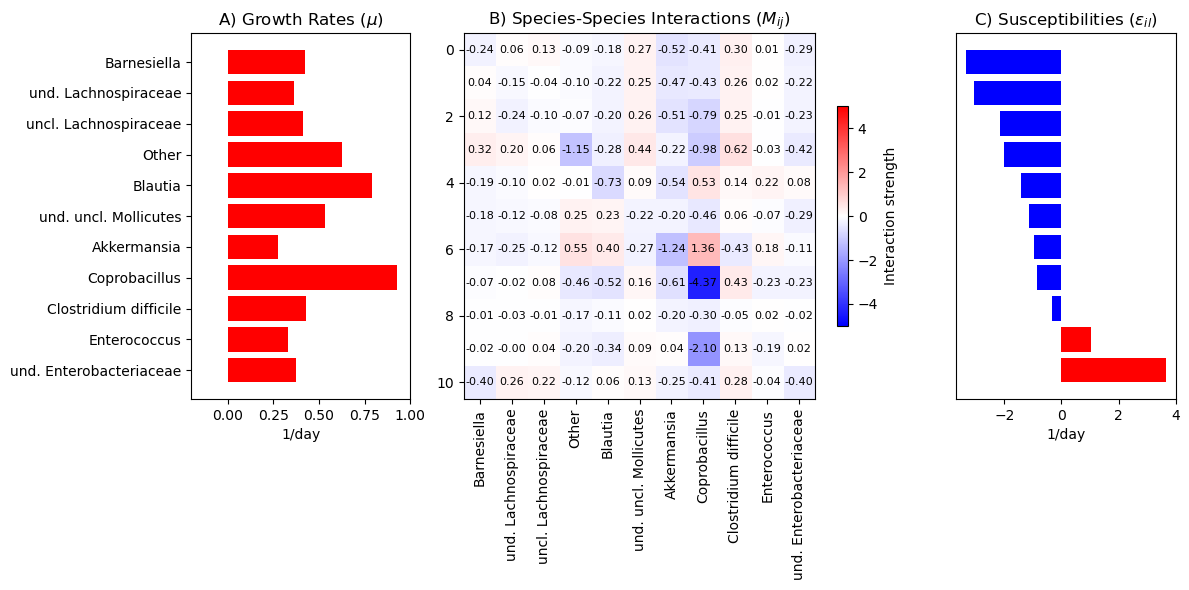

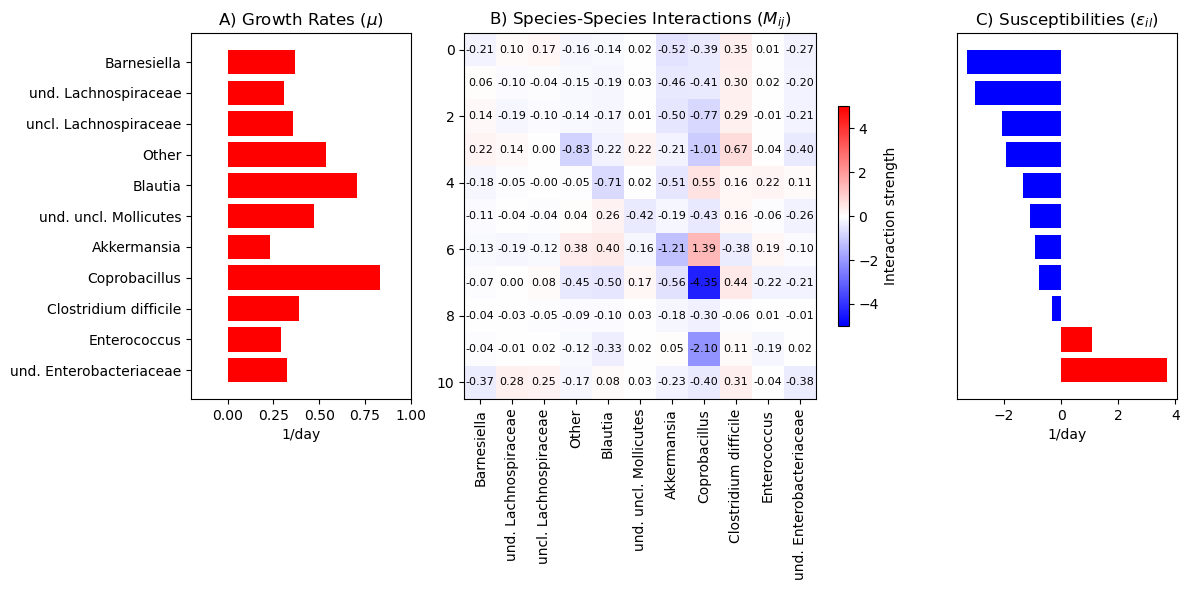

In [9]:
mu = theta_1[:, -2] 
M = theta_1[:, :-2]
epsilon = theta_1[:, -1]
fig_1= mI.plot_model_parameters(mu, M, epsilon, desired_order)
# fig_1.savefig('../figure/model_para_1.svg')
# fig_1.savefig('../figure/model_para_1.eps')
plt.show()

mu = theta_2[:, -2]
M = theta_2[:, :-2]
epsilon = theta_2[:, -1]
fig_2 = mI.plot_model_parameters(mu, M, epsilon, desired_order)
# fig_2.savefig('../figure/model_para_2.svg')
# fig_2.savefig('../figure/model_para_2.eps')
plt.show()

##### **Simulate the microbial dynamics using inferred model parameters**

Let's use the provided forward difference quotients for the simulation. Here the model parameters are inferred using data of replicate 1 and 3. The replicate 2 is used to provide the initial conditions.

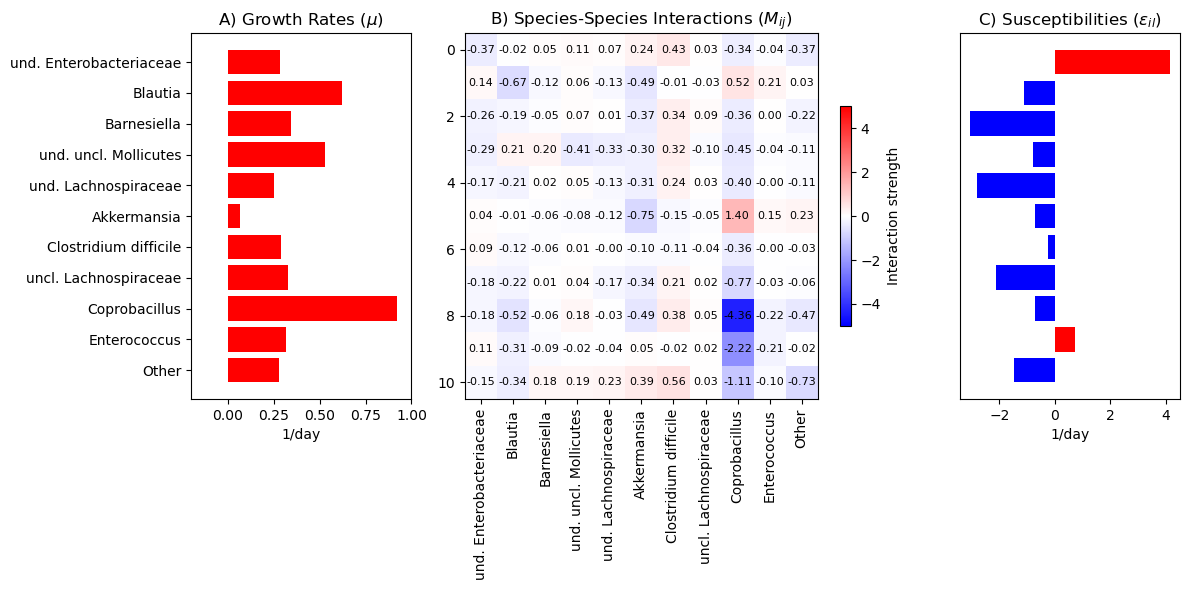

In [10]:
# Infer the model parameters using replicate 1 and 3 only.
Y_data_3 = np.hstack((Y_data_2[:, 0:25], Y_data_2[:, 51:]))
F_data_3 = np.hstack((F_data_2[:, 0:25], F_data_2[:, 51:]))

theta_3 = mI.compute_theta(F_data_3, Y_data_3, D_lmd)  # Calculate theta for the third dataset

mu = theta_3[:, -2]
M = theta_3[:, :-2]
epsilon = theta_3[:, -1]
fig_3 = mI.plot_model_parameters(mu, M, epsilon, current_order)
# fig_3.savefig('../figure/model_para_3.svg')
# fig_3.savefig('../figure/model_para_3.eps')
plt.show()

Here let's simulate the microbial dynamics using the replicate 2 of population 2 as the initial conditions

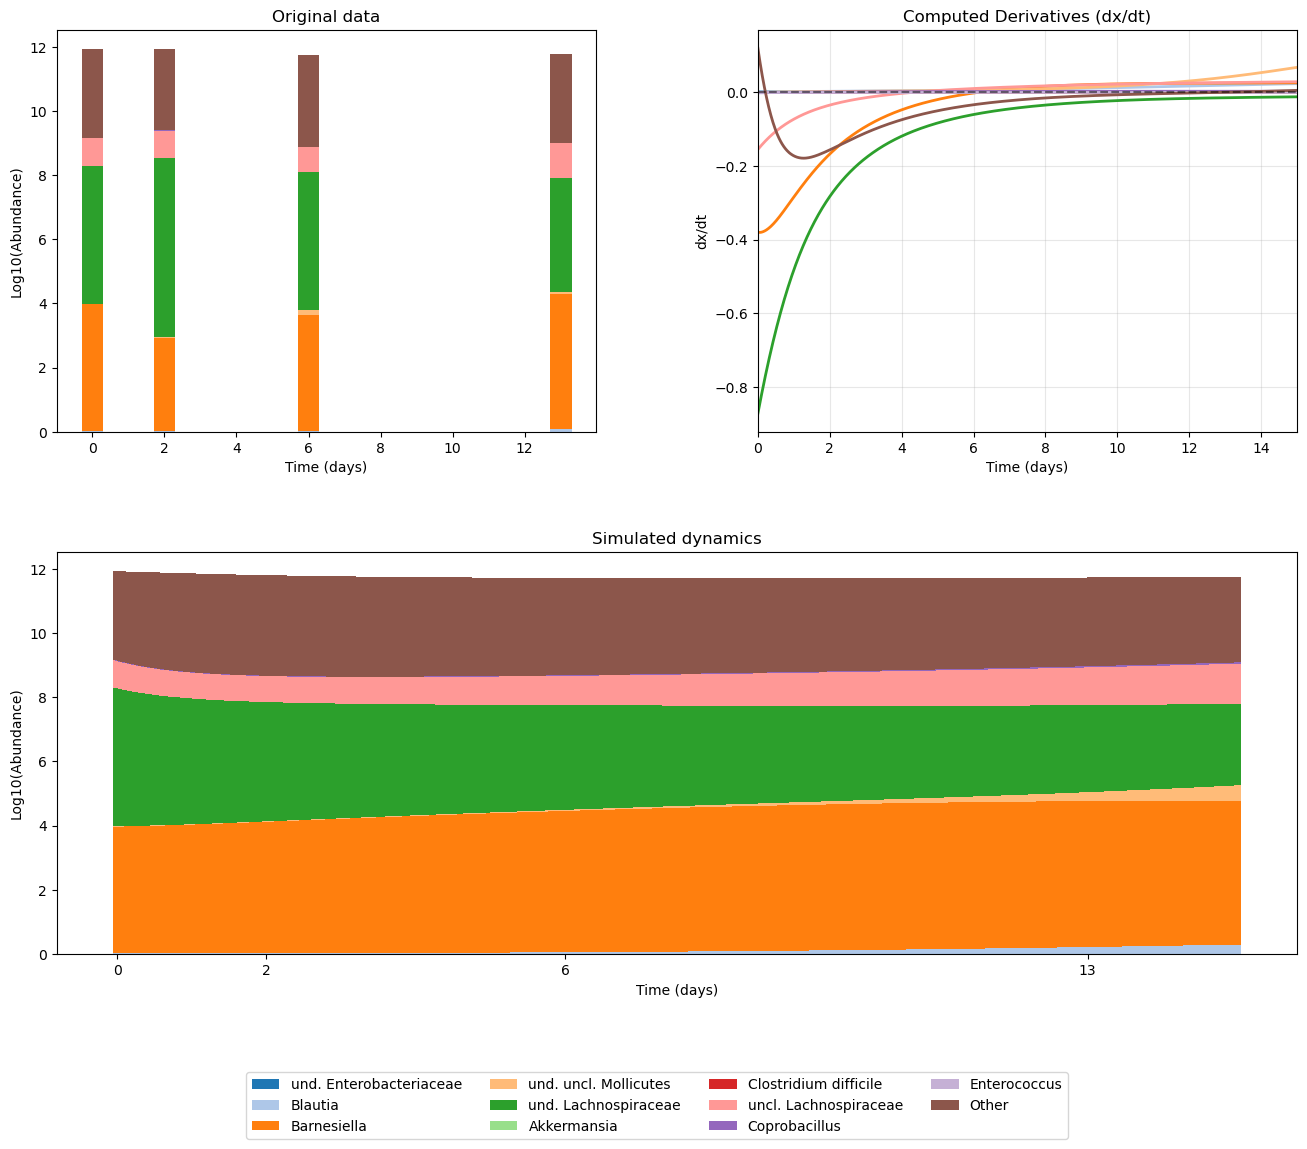

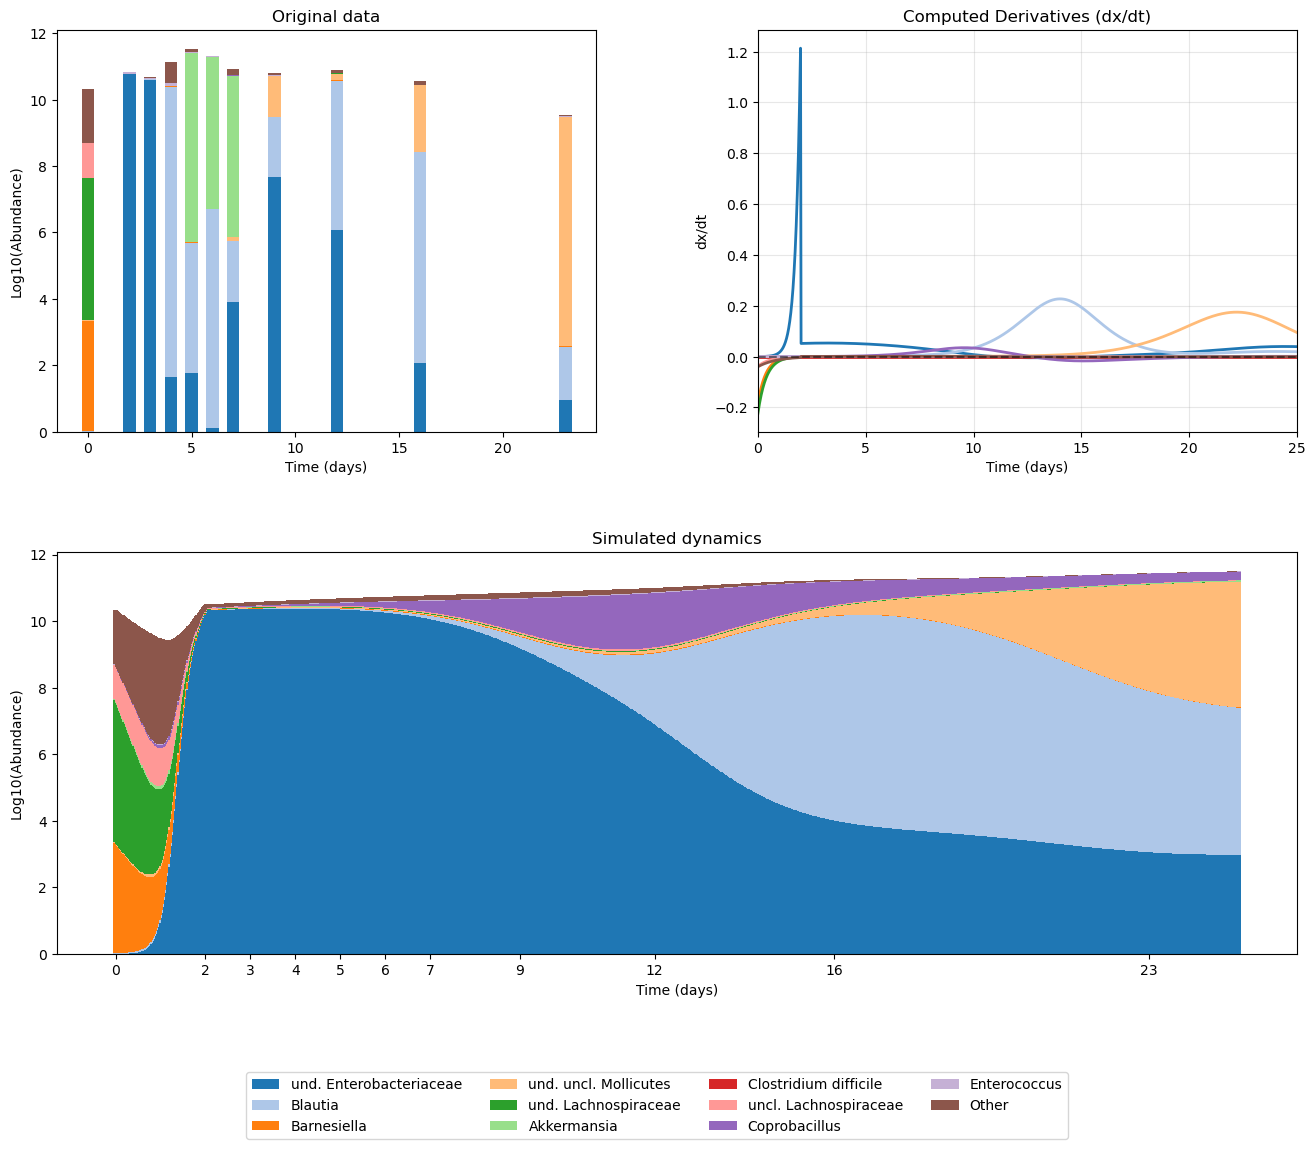

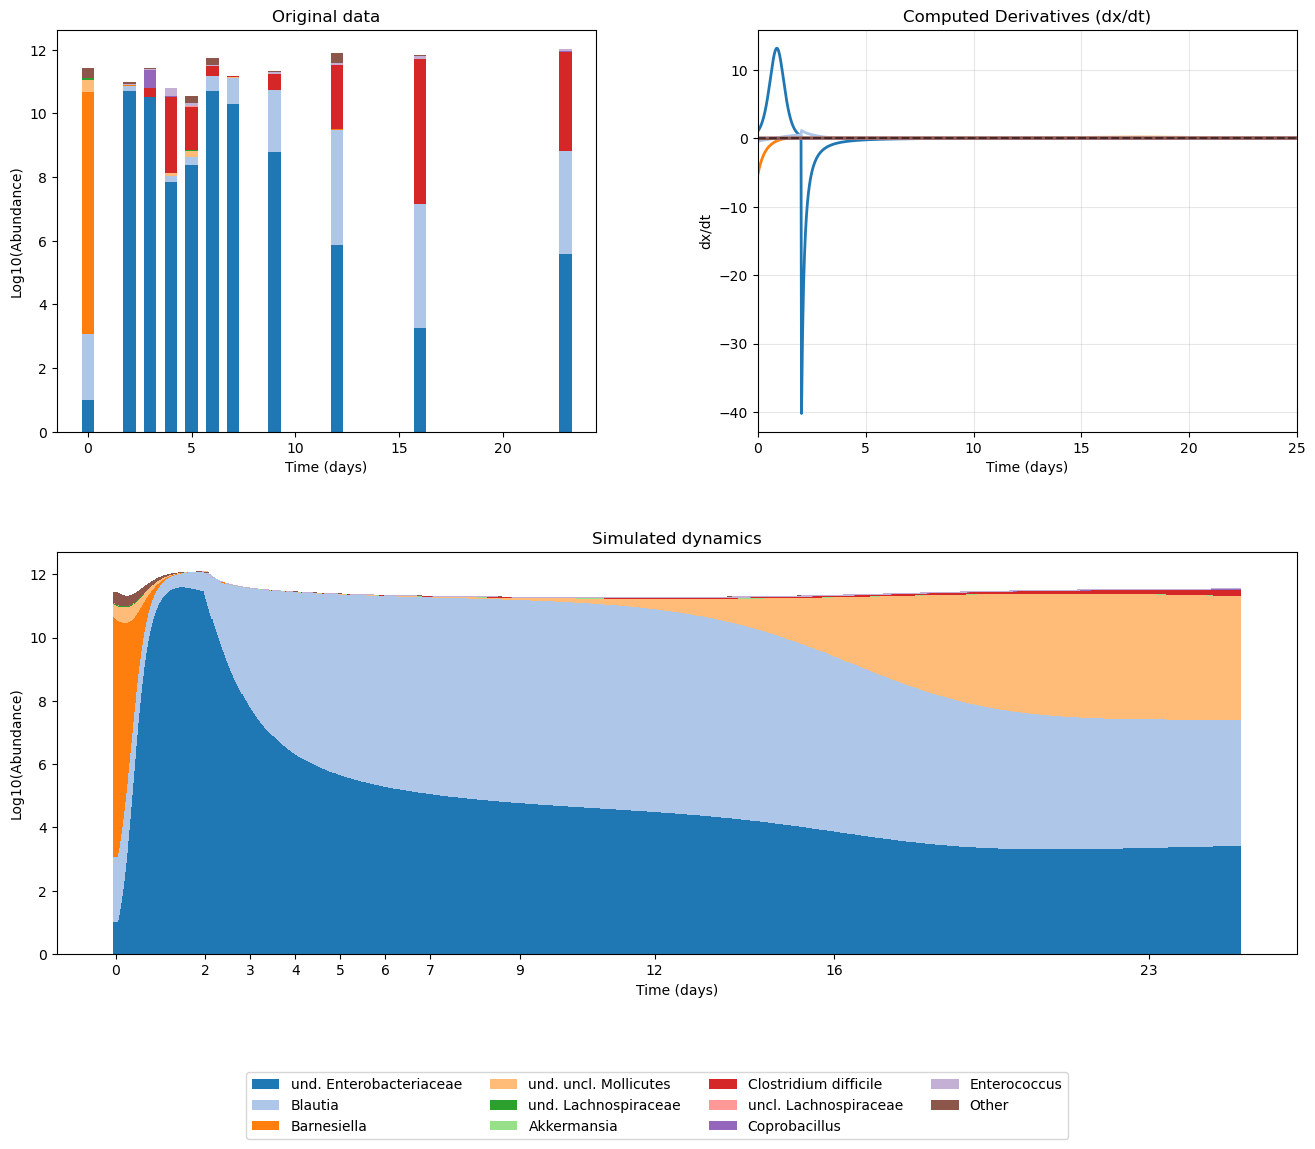

In [11]:
num_t = 1000

orig_data_3 = Y_data_2[:-2, 40:51]  # Original data for population 3
orig_data_2 = Y_data_2[:-2, 25:36]  # Original data for population 2
orig_data_1 = Y_data_2[:-2, 36:40]  # Original data for population 1

x0_1 = orig_data_1[:, 0].reshape(-1, 1) 
x0_2 = orig_data_2[:, 0].reshape(-1, 1)  
x0_3 = np.hstack((orig_data_3[:, 0].reshape(-1, 1), (orig_data_3[:, 1].reshape(-1, 1)))) 

x_intro_1 = np.zeros(x0_1.shape[0])
perturb_start_end_1 = None

x_intro_2 = np.zeros(x0_2.shape[0])
perturb_start_end_2 = np.array([[0, 2]])

x_intro_3 = np.zeros(x0_3.shape[0])
x_intro_3[6] = 2 
perturb_start_end_3 = np.array([[0, 2]])

orig_time_1 = all_time[4].astype(np.float64)
orig_time_2 = all_time[3].astype(np.float64)
orig_time_3 = all_time[5].astype(np.float64)

t_span_1 = [0, 15]
t_span_2 = [0, 25]
t_span_3 = [0, 25]

x_sim, t_sim, dx_sim = mI.gLV_simulation(t_span_1, num_t, x0_1, theta_3, x_intro=x_intro_1, perturb_start_end=perturb_start_end_1)
fig4 = mI.plot_simulation(species, orig_data_1, orig_time_1, x_sim, t_sim, dx_sim)
plt.show()
# fig4.savefig('../figure/simulation_1.svg')
# fig4.savefig('../figure/simulation_1.eps')

x_sim, t_sim, dx_sim = mI.gLV_simulation(t_span_2, num_t, x0_2, theta_3, x_intro=x_intro_2, perturb_start_end=perturb_start_end_2)
fig5 = mI.plot_simulation(species, orig_data_2, orig_time_2, x_sim, t_sim, dx_sim)
plt.show()
# fig5.savefig('../figure/simulation_2.svg')
# fig5.savefig('../figure/simulation_2.eps')

x_sim, t_sim, dx_sim = mI.gLV_simulation(t_span_3, num_t, x0_3, theta_3, x_intro=x_intro_3, perturb_start_end=perturb_start_end_3)
fig6 = mI.plot_simulation(species, orig_data_3, orig_time_3, x_sim, t_sim, dx_sim)
plt.show()
# fig6.savefig('../figure/simulation_3.svg')
# fig6.savefig('../figure/simulation_3.eps')